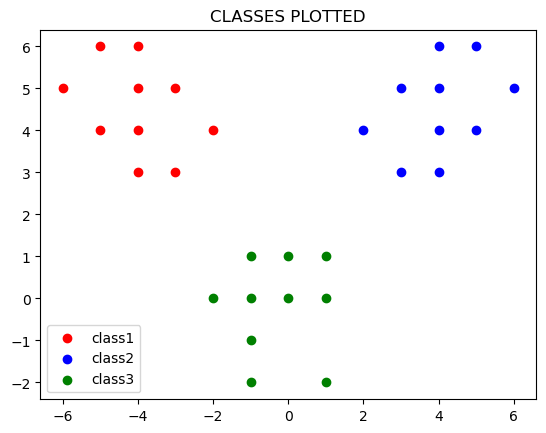

[100]


D:\Programs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)
D:\Programs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26). If you observe this warning while using RFE or SelectFromModel, use the importance_getter parameter instead.
  warnings.warn(msg, category=FutureWarning)


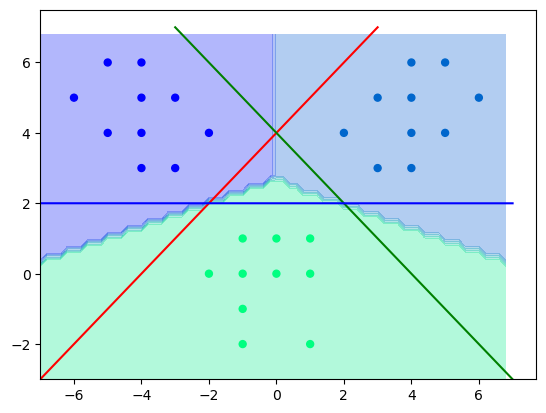

In [32]:
# importing Matplotlib and Numpy Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

# The data are given as list of lists (2d list)
data = np.array([
    (-3, 5), (-6, 5), (-2, 4), (-3, 3), (-5, 6), (-5, 4), (-4, 3), (-4, 4), (-4, 6), (-4, 5),
    (3, 5), (6, 5), (2, 4), (3, 3), (5, 6), (5, 4), (4, 3), (4, 4), (4, 6), (4, 5),
    (0, 1), (0, 0), (-1, -1), (-1, -2), (-1, 1), (-2, 0), (1, 0), (1, 1), (1, -2), (-1, 0)
])

# Taking transpose
x, y = data.T

# create test dataset
# for i in range(0, 10):
#     a = (x[i] + x[i+10] + x[i+20])/3
#     b = (y[i] + y[i+10] + y[i+20])/3
#     print(a,b)


# plot our list in X,Y coordinates
index_sets = (0, 10, 20,  30)
for i, colour in enumerate(['red', 'blue', 'green']):
    plt.scatter(x[index_sets[i]:index_sets[i+1]], y[index_sets[i]:index_sets[i+1]], color = colour)
plt.legend(['class1', 'class2', 'class3'], loc='lower left')    
plt.title("CLASSES PLOTTED")
plt.show()

# # SVM classifier to find hyperplane
X_data = data
y_data1 = np.array(10 * [0])
y_data2 = np.array(10 * [100])
y_data3 = np.array(10 * [250])
y_data = np.concatenate((y_data1, y_data2, y_data3), axis=0)

classifier = OneVsRestClassifier(SVC(kernel='linear'))
classifier.fit(X_data, y_data)

# predict samples
# test_sample = np.array([(0, 3.66)])
# print(classifier.predict(test_sample))

fig, ax = plt.subplots()

# create a mesh to plot in
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.arange(x_min, x_max, .2),np.arange(y_min, y_max, .2))
Z = classifier.predict(np.c_[xx2.ravel(), yy2.ravel()])
Z = Z.reshape(xx2.shape)
ax.contourf(xx2, yy2, Z, cmap=plt.cm.winter, alpha=0.3)
ax.scatter(X_data[:, 0], X_data[:, 1], c=y_data, cmap=plt.cm.winter, s=25)

def reconstruct(w,b):
    k = - w[0] / w[1]
    b = - b[0] / w[1]

    if k >= 0:
        x0 = max((y_min-b)/k,x_min)
        x1 = min((y_max-b)/k,x_max)
    else:
        x0 = max((y_max-b)/k,x_min)
        x1 = min((y_min-b)/k,x_max)
    if np.abs(x0) == np.inf: x0 = x_min
    if np.abs(x1) == np.inf: x1 = x_max
    
    xx = np.linspace(x0,x1)
    yy = k*xx+b

    return xx,yy

xx,yy = reconstruct(classifier.coef_[0],classifier.intercept_[0])
ax.plot(xx,yy,'r')
xx,yy = reconstruct(classifier.coef_[1],classifier.intercept_[1])
ax.plot(xx,yy,'g')
xx,yy = reconstruct(classifier.coef_[2],classifier.intercept_[2])
ax.plot(xx,yy,'b')